In [1]:
from multiprocessing.dummy import Pool as ThreadPool

import numpy as np


def get_batch(filenames):
    
    fnames, truth_indicies = zip(*filenames)
    
    def proces_img(item):
        path = item
        return scipy.misc.imresize(np.array(Image.open(path), (256, 256)))
    
    pool = ThreadPool()
    return pool.map(proces_img, fnames)

In [3]:
scipy.misc.imresize(np.array(
    Image.open('/Users/anjueappen/png/axe/649.png')), (256, 256))

NameError: name 'scipy' is not defined

In [ ]:
# coding: utf-8

# In[1]:

import cv2


import math
import random
import os
from PIL import Image
import scipy.misc
import cv2
import numpy as np
import matplotlib.pyplot as plt

import multiprocessing

TRANS_SPREAD = 100

filenames = [('/Users/anjueappen/png/axe/649.png', 4), ('/Users/anjueappen/png/axe/650.png', 4), 
            ('/Users/anjueappen/png/ant/244.png', 5), ('/Users/anjueappen/png/ant/245.png', 5), 
           ('/Users/anjueappen/png/ant/246.png', 5), ('/Users/anjueappen/png/ant/247.png', 5), 
           ('/Users/anjueappen/png/ant/248.png', 5), ('/Users/anjueappen/png/ant/249.png', 5)]

def getExample(dims):
    try:
        imgPath, index = random.choice(filenames) 
        truth = np.zeros(250)
        truth[index] = 1
        return scipy.misc.imresize(np.array(Image.open(imgPath)), dims), truth
    
    except Exception as e:
        print e
        return getExample(dims)

def getExamplesGenerator(dims):
    def examplesGenerator(q):
        while True:
            q.put(getExample(dims))

    queue = multiprocessing.Queue(maxsize=128)
    for w in range(0, 16):
        proc = multiprocessing.Process(target=examplesGenerator, args=(queue,))
        proc.start()

    while True:
        yield queue.get()

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

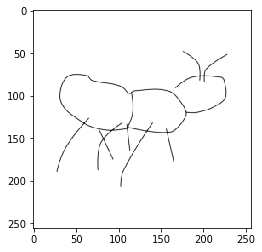

In [15]:
def get_batch(batch_size, dims):
    stuff = getExamplesGenerator(dims), batch_size)
    imgs, truths = zip(*stuff)
    return np.array(imgs), np.array(truths)

get_batch(2, (256, 256))